In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from astroExplain.spectra.explanation import TellMeWhy
from anomaly.constants import GALAXY_LINES
from anomaly.utils import line_width_from_velocity

In [2]:
# directories for data
bin_id = "bin_03"
user = "/home/edgar"
work_directory = f"{user}/spectra/0_01_z_0_5_4_0_snr_inf"
model = "256_128_64/latent_12/"
# metric = "mse_filter_250kms_noRel100"
metric = "mse_filter_250kms_noRel97"
data_directory = (
    f"{work_directory}/{bin_id}/"
    f"explanation/{model}/{metric}"
)

In [3]:
wave = np.load(f"{work_directory}/wave_spectra_imputed.npy")
anomalies = np.load(f"{data_directory}/top_anomalies.npy")
df_anomalies = pd.read_csv(
    f"{data_directory}/top_anomalies.csv.gz",
    index_col="specobjid"
)

median_spectrum = np.load(
    f"{work_directory}/{bin_id}/median_spectrum.npy"
)
mean_spectrum = np.load(
    f"{work_directory}/{bin_id}/average_spectrum.npy"
)

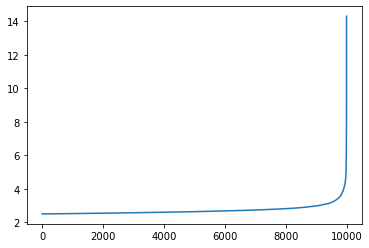

In [4]:
plt.plot(df_anomalies["score"].to_numpy())

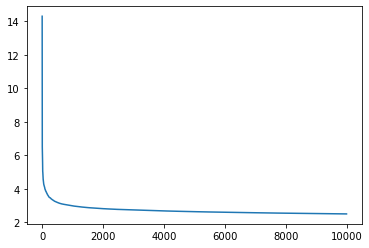

In [5]:
# sort scores in descending order in place in the df
df_anomalies.sort_values(by="score", ascending=False, inplace=True)
plt.plot(df_anomalies["score"].to_numpy())

Explore average patterns

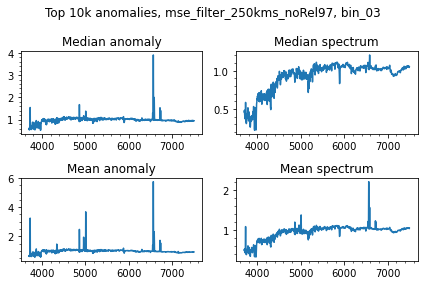

In [6]:
# average for top 10k anomalies
median_anomalous_spectrum = np.median(anomalies, axis=0)
mean_anomalous_spectrum = np.mean(anomalies, axis=0)

fig, axs = plt.subplots(2, 2, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"Top 10k anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0, 0].plot(wave, median_anomalous_spectrum)
axs[0, 0].set_title("Median anomaly")

axs[1, 0].plot(wave, mean_anomalous_spectrum)
axs[1, 0].set_title("Mean anomaly")

axs[0, 1].plot(wave, median_spectrum)
axs[0, 1].set_title("Median spectrum")

axs[1, 1].plot(wave, mean_spectrum)
axs[1, 1].set_title("Mean spectrum")

# save median and mean spectra for later use
np.save(
    f"{data_directory}/median_anomalous_spectrum_10k.npy",
    median_anomalous_spectrum
)

np.save(
    f"{data_directory}/mean_anomalous_spectrum_10k.npy",
    mean_anomalous_spectrum
)

# save figure to pdf in Downloads folder
fig.savefig(
    f"{data_directory}/median_mean_anomalous_spectra_{bin_id}_10k.pdf"
)

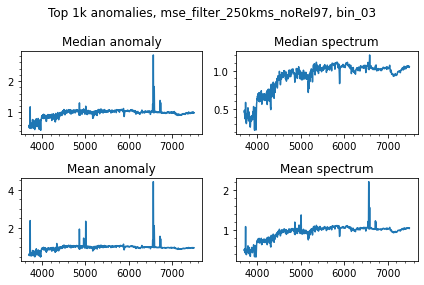

In [7]:
# average for top 1k anomalies
median_anomalous_spectrum_1k = np.median(anomalies[:1000], axis=0)
mean_anomalous_spectrum_1k = np.mean(anomalies[:1000], axis=0)

fig, axs = plt.subplots(2, 2, figsize=None, tight_layout=True)
# add title to the figure

fig.suptitle(
    f"Top 1k anomalies, {metric}, {bin_id}",
    fontsize=12
)
# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0, 0].plot(wave, median_anomalous_spectrum_1k)
axs[0, 0].set_title("Median anomaly")

axs[1, 0].plot(wave, mean_anomalous_spectrum_1k)
axs[1, 0].set_title("Mean anomaly")

axs[0, 1].plot(wave, median_spectrum)
axs[0, 1].set_title("Median spectrum")

axs[1, 1].plot(wave, mean_spectrum)
axs[1, 1].set_title("Mean spectrum")

# save median and mean spectra for later use
np.save(
    f"{data_directory}/median_anomalous_spectrum_1k.npy",
    median_anomalous_spectrum
)

np.save(
    f"{data_directory}/mean_anomalous_spectrum_1k.npy",
    mean_anomalous_spectrum
)

# save figure to pdf in Downloads folder
fig.savefig(
    f"{data_directory}/median_mean_anomalous_spectra_{bin_id}_1k.pdf"
)

Explore explanations

In [8]:
# create array with weights for top all anomalies

explanations_directory = f"{data_directory}/000"

weights_all = np.empty(anomalies.shape)


for i, specobjid in enumerate(df_anomalies.index.to_numpy()):

    with open(
        f"{explanations_directory}/{specobjid}.pkl", "rb"
    ) as file:
        explanation = pickle.load(file)
        why = TellMeWhy(wave=wave, explanation=explanation)

        weights_all[i, :] = why.smooth_and_normalize_explanation()

# new array to store the absolute values of the weights
weights_all_abs = np.abs(weights_all)

# save both arrays for later use

np.save(
    f"{data_directory}/weights_all.npy",
    weights_all
)

np.save(
    f"{data_directory}/weights_all_abs.npy",
    weights_all_abs
)


Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of explanation
Get heat map of expl

Summary stats of explanation weights

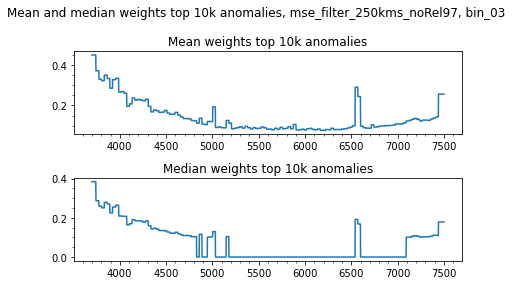

In [9]:
# mean and median of the explanation weights for all anomalies

mean_weigh_all_abs = np.mean(weights_all_abs, axis=0)
median_weigh_all_abs = np.median(weights_all_abs, axis=0)


# plot the mean and median of the weights
fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"Mean and median weights top 10k anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, mean_weigh_all_abs)
axs[0].set_title("Mean weights top 10k anomalies")

axs[1].plot(wave, median_weigh_all_abs)
axs[1].set_title("Median weights top 10k anomalies")

# save figure to pdf in data directory

fig.savefig(
    f"{data_directory}/abs_mean_median_weights_top_10k_anomalies.pdf"
)


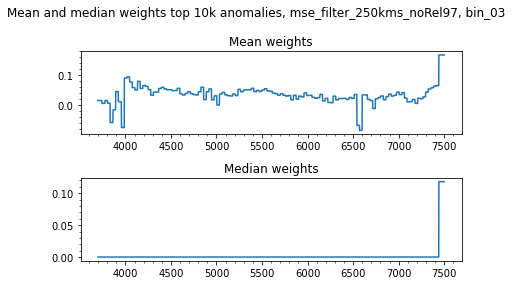

In [10]:
# repeat previous steps for but on the original weights_all array

mean_weigh_all = np.mean(weights_all, axis=0)
median_weigh_all = np.median(weights_all, axis=0)

fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"Mean and median weights top 10k anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, mean_weigh_all)
axs[0].set_title("Mean weights")

axs[1].plot(wave, median_weigh_all)
axs[1].set_title("Median weights")

# save figure to pdf in data directory

fig.savefig(
    f"{data_directory}/mean_median_weights_top_10k_anomalies.pdf"
)


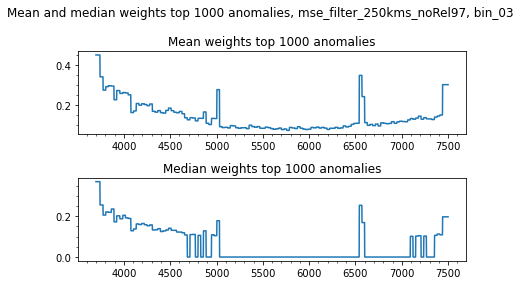

In [11]:
# mean and median of the explanation weights for the top 1000 anomalies

mean_weigh_top_1000 = np.mean(weights_all_abs[:1000], axis=0)
median_weigh_top_1000 = np.median(weights_all_abs[:1000], axis=0)

fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"Mean and median weights top 1000 anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, mean_weigh_top_1000)
axs[0].set_title("Mean weights top 1000 anomalies")

axs[1].plot(wave, median_weigh_top_1000)
axs[1].set_title("Median weights top 1000 anomalies")

# save figure to pdf in data directory

fig.savefig(
    f"{data_directory}/abs_mean_median_weights_top_1000_anomalies.pdf"
)


## Inspect std of explanation weights

Text(0.5, 1.0, 'STD weights absolute values')

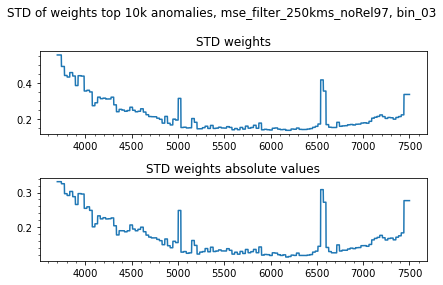

In [12]:
# compute sd of the weights along the wavelength axis

sd_weights_all = np.std(weights_all, axis=0)
sd_weights_all_abs = np.std(weights_all_abs, axis=0)

# plot the sd of the weights

fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"STD of weights top 10k anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, sd_weights_all)
axs[0].set_title("STD weights")

axs[1].plot(wave, sd_weights_all_abs)
axs[1].set_title("STD weights absolute values")


Text(0.5, 1.0, 'STD weights absolute values')

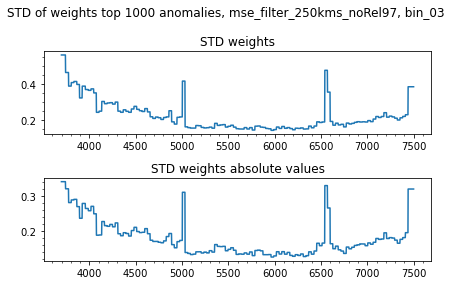

In [13]:
# compute standard deviation of the weights along the wavelength axis for the top 1000 anomalies

sd_weights_top_1000 = np.std(weights_all[:1000], axis=0)
sd_weights_top_1000_abs = np.std(weights_all_abs[:1000], axis=0)

# plot the sd of the weights

fig, axs = plt.subplots(2, 1, figsize=None, tight_layout=True)

# add title to the figure

fig.suptitle(
    f"STD of weights top 1000 anomalies, {metric}, {bin_id}",
    fontsize=12
)

# add minor ticks for all axes
for ax in axs.flat:
    ax.minorticks_on()

axs[0].plot(wave, sd_weights_top_1000)
axs[0].set_title("STD weights")

axs[1].plot(wave, sd_weights_top_1000_abs)
axs[1].set_title("STD weights absolute values")



## Analyze clusters among anomalies
The clustering approach can help to gain insight into the model by grouping the anomalous spectra into clusters based on their similarity in terms of the weights assigned by the LIME algorithm. This can help identify patterns or trends in the explanations that may not be immediately apparent from the weights alone.

For example, certain clusters might have higher explanation weights for certain wavelength ranges, or certain clusters have higher explanation weights overall. This can help to understand which features of the spectra are most important for the model's predictions, and can potentially uncover new scientific insights.

Additionally, by plotting the mean spectrum and mean explanation weights for each cluster, I can get a sense of how the model is using different features of the spectra to make its predictions, and identify any patterns or trends in the model's behavior that may be relevant to the anomaly detection task.

In [14]:
# Use k-means clustering to group the spectra into 10 clusters based on their explanations
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(weights_all_abs)

Number of spectra in cluster 0: 3420
Number of spectra in cluster 1: 4161
Number of spectra in cluster 2: 2419


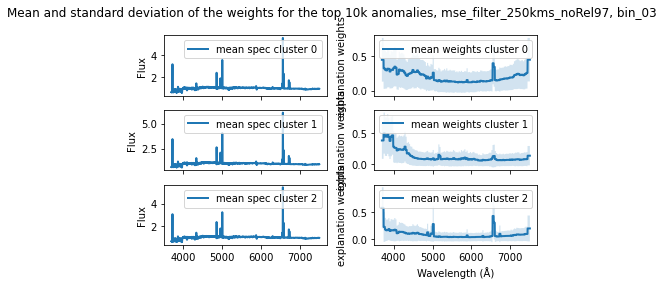

In [15]:
# Create a figure with a grid of subplots
fig, axs = plt.subplots(
    kmeans.n_clusters, 2, sharex=True, tight_layout=True,
    figsize=None
)

# Add a title to the figure
fig.suptitle(
    f"Mean and standard deviation of the weights for the top 10k anomalies, {metric}, {bin_id}",
    fontsize=12
)

# Loop over the clusters
for i in range(kmeans.n_clusters):
    # Select the spectra in the cluster
    cluster_anomalies = anomalies[cluster_labels == i]
    cluster_weights = weights_all_abs[cluster_labels == i]

    # Compute summary statistics for the explanations in the cluster
    cluster_mean_spec = np.mean(cluster_anomalies, axis=0)
    cluster_mean_weights = np.mean(cluster_weights, axis=0)
    cluster_std_weights = np.std(cluster_weights, axis=0)

    # Plot the mean and standard deviation for the cluster
    axs[i, 0].plot(
        wave, cluster_mean_spec, linewidth=2,
        label=f"mean spec cluster {i}"
    )

    axs[i, 0].legend()
    axs[i, 0].set_ylabel('Flux')
    
    axs[i, 1].plot(
        wave, cluster_mean_weights, linewidth=2,
        label=f"mean weights cluster {i}"
    )
    axs[i, 1].legend()

    axs[i, 1].fill_between(
        wave, cluster_mean_weights - cluster_std_weights,
        cluster_mean_weights + cluster_std_weights, alpha=0.2
    )
    
    axs[i, 1].set_ylabel('explanation weights')

    # Print the number of spectra in the cluster
    print(f'Number of spectra in cluster {i}: {len(cluster_anomalies)}')

# Label the x-axis and show the figure
plt.xlabel('Wavelength (Å)')
plt.show()

#save figure to pdf in data directory

fig.savefig(
    f"{data_directory}/cluster_mean_std_weights_top_10k_anomalies.pdf"
)

## Analyze emission lines

In [28]:
# Retrieve the line widths for each line using the line_width_from_velocity function
line_widths = {}

for line, wavelength in GALAXY_LINES.items():
    line_width = line_width_from_velocity(200, wavelength)
    line_widths[line] = line_width

# Create an array to store the explanations weights for each line

# weights_per_line = np.empty((anomalies.shape[0], len(line_widths)))

line_weights = {}

for line, line_width in line_widths.items():
    # Retrieve the explanations weights for the wavelengths within the line width
    line_wavelength = GALAXY_LINES[line]

    line_mask = (wave > line_wavelength - line_width) & (wave < line_wavelength + line_width)

    # wave_region = wave[line_mask]

    line_weights[line] = (weights_all_abs[:, line_mask], line_mask)

In [29]:
# Use a k-means clustering for each array in the list line_weights to cluster the explanations weights for each line in 10 clusters

n_clusters = 10

kmeans_per_line = {}

for line, (line_w, line_mask) in line_weights.items():
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(line_w)

    kmeans_per_line[line] = (kmeans, line_mask)


[5415, 505, 167, 994, 62, 374, 1394, 810, 38, 241]


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


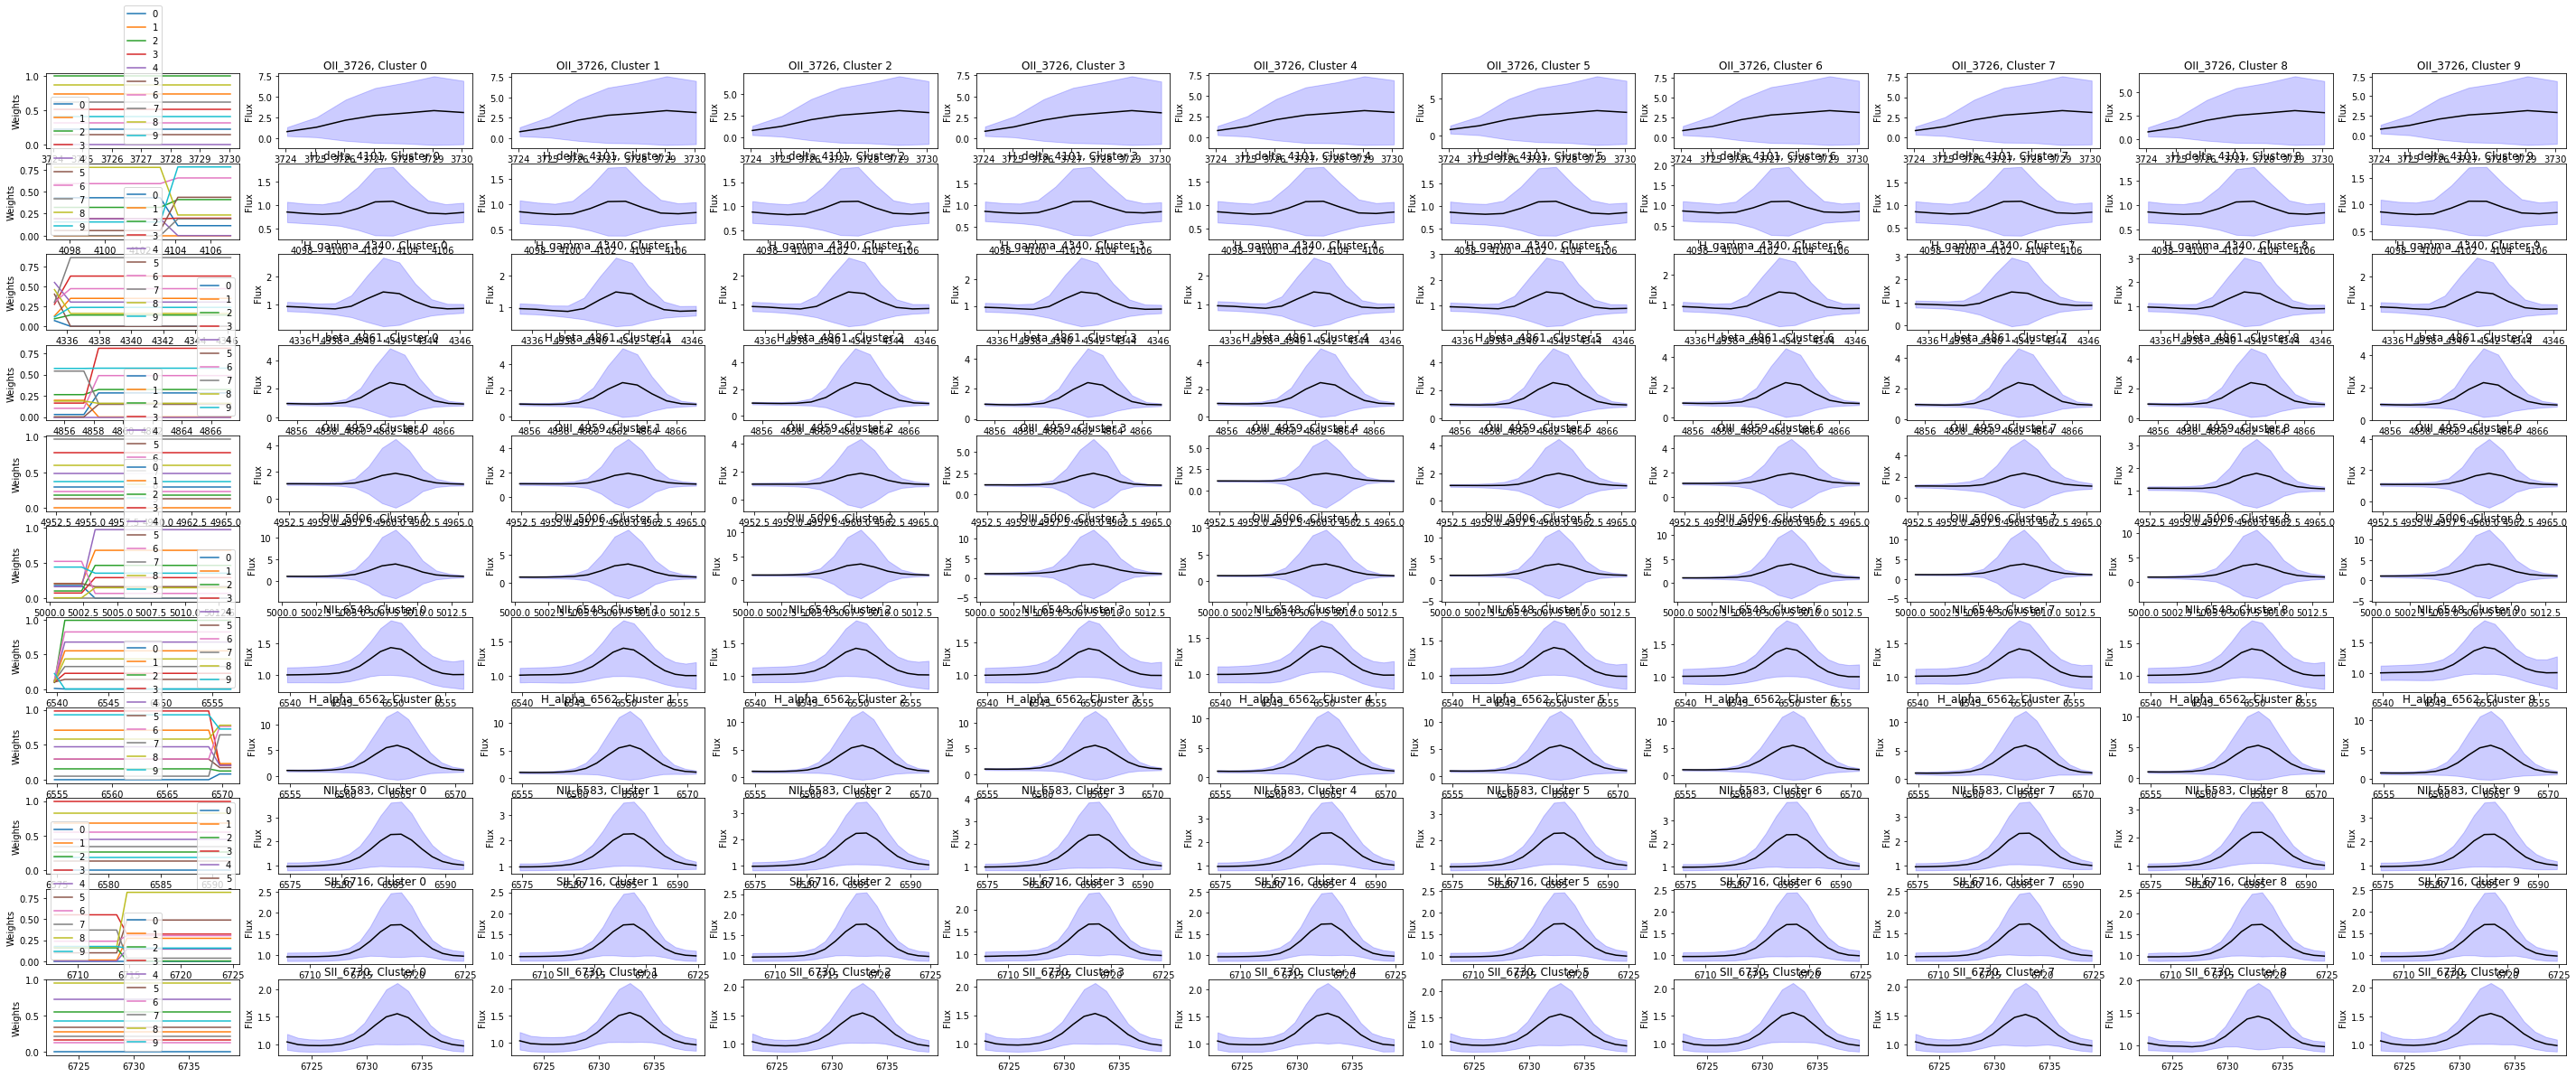

In [30]:
# Set up a grid of subplots
fig, axs = plt.subplots(
    nrows=len(kmeans_per_line), ncols=n_clusters + 1,
    tight_layout=True,
    figsize=(50, 20)
)

# Loop through each line in the dictionary of k-means models
for i, (line, (kmeans, line_mask)) in enumerate(kmeans_per_line.items()):
    # Get the cluster labels for the current line
    cluster_labels = kmeans.predict(line_weights[line][0])

    # Compute the mean and standard deviation of the weights and anomalies for each cluster
    mean_weights = []
    std_weights = []
    mean_anomalies = []
    std_anomalies = []

    n_spectra_per_cluster = []

    for j in range(n_clusters):
    
        mask = cluster_labels == j
        n_spectra_per_cluster.append(np.sum(mask))

        mean_weights.append(np.mean(line_weights[line][0][mask], axis=0))
        std_weights.append(np.std(line_weights[line][0][mask], axis=0))
    
        mean_anomalies.append(
            np.mean(anomalies[:, line_mask][mask], axis=0)
        )
        std_anomalies.append(
            np.std(anomalies[:, line_mask][mask], axis=0)
        )

    # Plot the mean spectrum and mean explanation weights for each cluster

    wave_region = wave[line_mask]

    for n in range(n_clusters):

        axs[i, 0].plot(wave_region, mean_weights[n], label=f'{n}')

    axs[i, 0].set_ylabel('Weights')
    axs[i, 0].legend()
    
    # Add a plot for each cluster's mean spectrum to the remaining columns
    
    for j in range(n_clusters):

        axs[i, j+1].plot(wave_region, mean_anomalies[j], c='black')
        axs[i, j+1].set_ylabel('Flux')
        axs[i, j+1].set_title(f'{line}, Cluster {j}')
        axs[i, j+1].fill_between(
            wave_region,
            mean_anomalies[j] - std_anomalies[j],
            mean_anomalies[j] + std_anomalies[j],
            alpha=0.2,
            color='blue'
        )
print(n_spectra_per_cluster)